# Predicting Employee Attrition


This project will use a fictional employee information dataset created by IBM for use with their WATSON AI product. 

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

### Rating systems used in the data:

__Education__

|Data Value|Categorical Value|
| -------- | :-------------- |
|    1     | 'Below College' |
|    2     |    'College'    |
|    3     |   'Bachelor'    |
|    4     |    'Master'     |
|    5     |    'Doctor'     |


__EnvironmentSatisfaction__

|Data Value|Categorical Value|
| -------- | :-------------- |
|    1     |      'Low'      | 
|    2     |    'Medium'     |
|    3     |     'High'      |
|    4     |   'Very High'   |


__JobInvolvement__

|Data Value|Categorical Value|
| -------- | :-------------- |
|    1     |      'Low'      | 
|    2     |    'Medium'     |
|    3     |     'High'      |
|    4     |   'Very High'   |

__JobSatisfaction__

|Data Value|Categorical Value|
| -------- | :-------------- |
|    1     |      'Low'      | 
|    2     |    'Medium'     |
|    3     |     'High'      |
|    4     |   'Very High'   |

__PerformanceRating__

|Data Value|Categorical Value|
| -------- | :-------------- |
|    1     |      'Low'      | 
|    2     |      'Good'     |
|    3     |   'Excellent'   |
|    4     |  'Outstanding'  |

__RelationshipSatisfaction__

|Data Value|Categorical Value|
| -------- | :-------------- |
|    1     |      'Low'      | 
|    2     |    'Medium'     |
|    3     |     'High'      |
|    4     |   'Very High'   |





In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('data.csv')
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [6]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [7]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

`EmployeeCount`, `Over18`, and `StandardHours` all have only one value in them; they won't help with analysis, so I'll drop them. `EmployeeNumber` is just an identifier for each employee, so I'll drop that one as well.

I'm also going to convert `Attrition` and `Overtime` into numerical columns using 1 for `Yes` and 0 for `No`.

In [8]:
df.drop(columns=['employeenumber', 'employeecount', 'over18', 'standardhours'], inplace=True)

In [9]:
df['attrition'] = df['attrition'].apply(lambda x: 1 if x=='Yes' else 0)
df['overtime'] = df['overtime'].apply(lambda x: 1 if x=='Yes' else 0)

Some of the numerical features involve salary or rate data - it isn't clear what `DailyRate`, `HourlyRate`, and `MonthlyRate` show. They do not relate to `MonthlyIncome`. I'm going to make decision here to leave those three columns out of my analysis and focus on `MonthlyIncome` as a potential indicator of `Attrition`.

In [10]:
df.drop(columns=['dailyrate', 'hourlyrate', 'monthlyrate'], inplace=True)

In [11]:
print(f"Count of Rows: {df.shape[0]} \n")
print(f"Count of Features: {df.shape[1]} \n")
print(f"Missing Data: {df.isna().values.sum()} \n")
print(f"Unique values: {df.nunique()}")

Count of Rows: 1470 

Count of Features: 28 

Missing Data: 0 

Unique values: age                           43
attrition                      2
businesstravel                 3
department                     3
distancefromhome              29
education                      5
educationfield                 6
environmentsatisfaction        4
gender                         2
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome               1349
numcompaniesworked            10
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
stockoptionlevel               4
totalworkingyears             40
trainingtimeslastyear          7
worklifebalance                4
yearsatcompany                37
yearsincurrentrole            19
yearssincelastpromotion       16
yearswithcurrmanager          

#### Target feature: 
 - Attrition

#### Numerical features:
 - Age
 - DistanceFromHome
 - Education
 - EnvironmentSatisfaction
 - JobInvolvement
 - JobLevel
 - JobSatisfaction
 - MonthlyIncome
 - NumCompaniesWorked
 - PercentSalaryHike
 - PerformanceRating
 - RelationshipSatisfaction
 - StockOptionLevel
 - TotalWorkingYears
 - TrainingTimesLastYear
 - WorkLifeBalance
 - YearsAtCompany
 - YearsInCurrentRole
 - YearsSinceLastPromotion
 - YearsWithCurrManager
 - OverTime

#### Categorical features:
 - BusinessTravel
 - Department
 - EducationField
 - Gender
 - JobRole
 - MaritalStatus



In [12]:
df.to_csv('use_data.csv')

In [13]:
numerical = ['age', 'distancefromhome', 'education', 'environmentsatisfaction', 'jobinvolvement', 
             'joblevel', 'jobsatisfaction', 'monthlyincome', 'numcompaniesworked', 'percentsalaryhike',
             'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'totalworkingyears',
             'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 
             'yearssincelastpromotion', 'yearswithcurrmanager', 'overtime']

categorical = ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus']

In [14]:
from plotting_module import *

## I. Exploratory Data Analysis

### Target Variable: Attrition

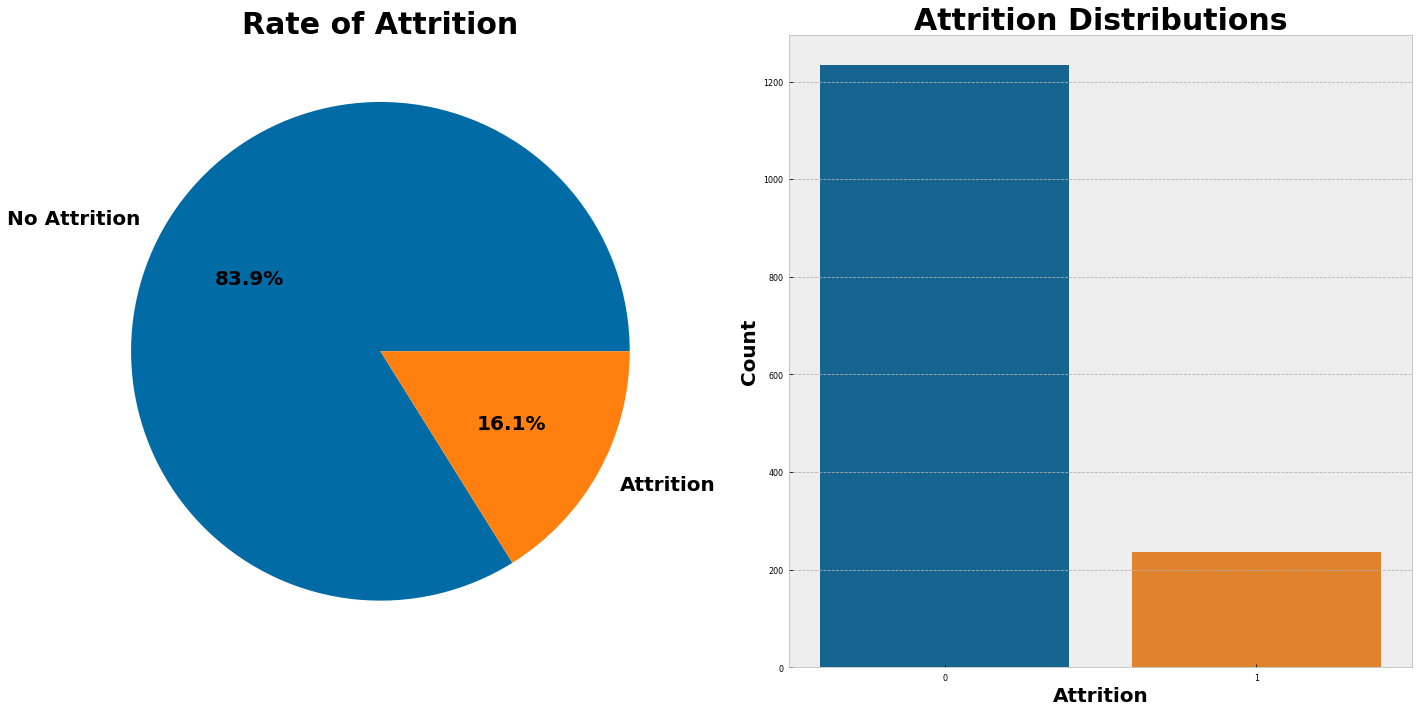

In [15]:
attrition_plot(df)

### Numerical Features

/home/tdraths/sb_assignments/employee_churn/plotting_module.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 3))


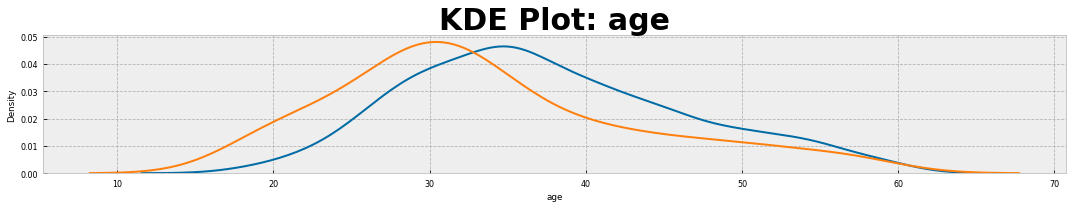

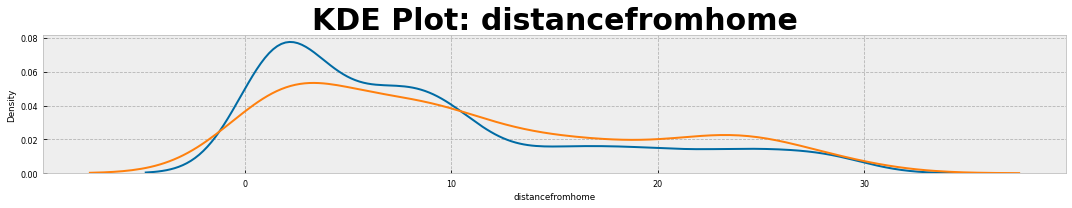

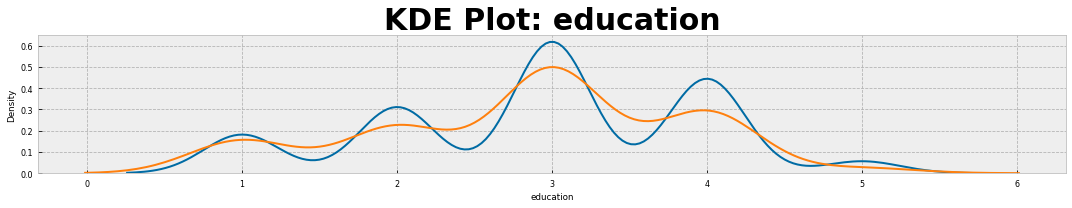

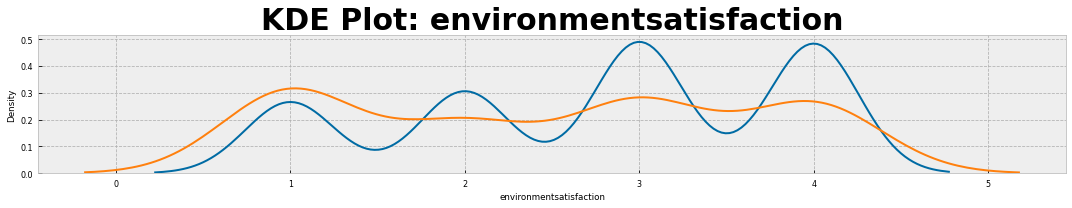

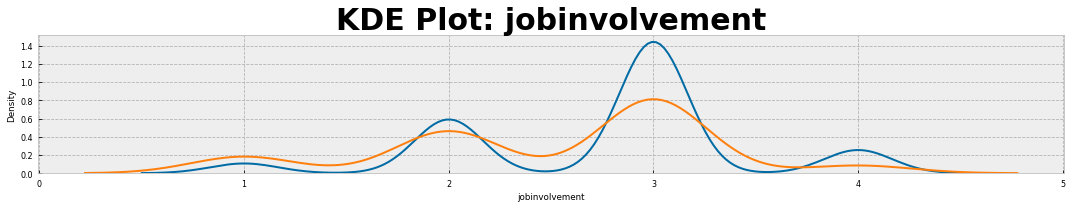

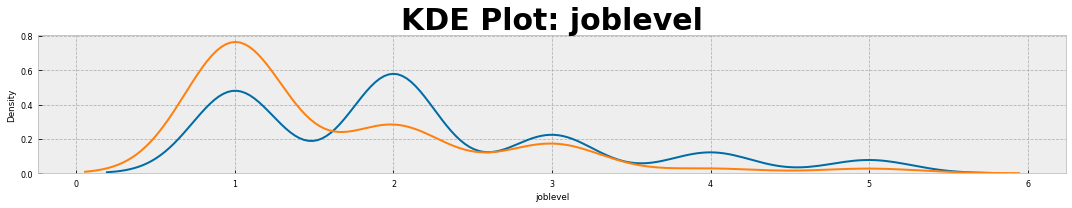

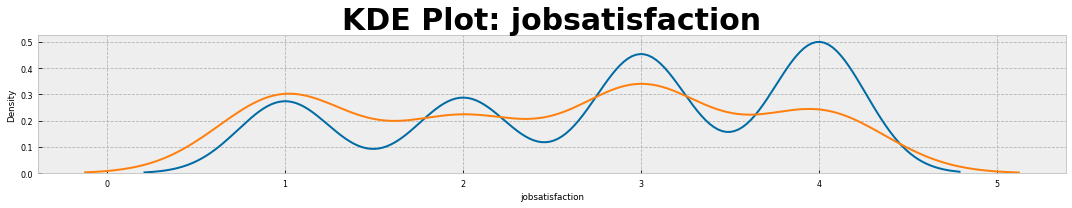

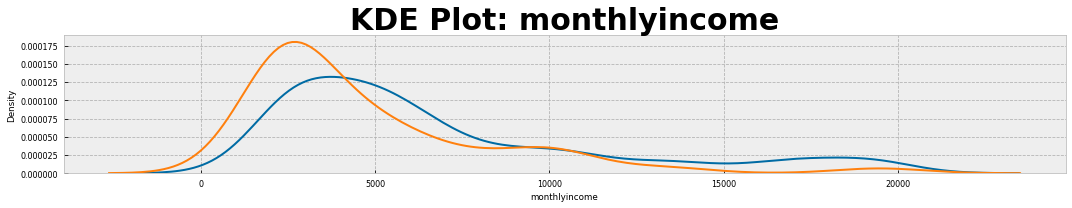

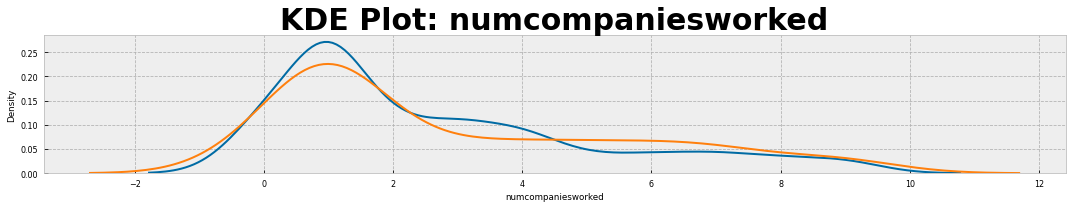

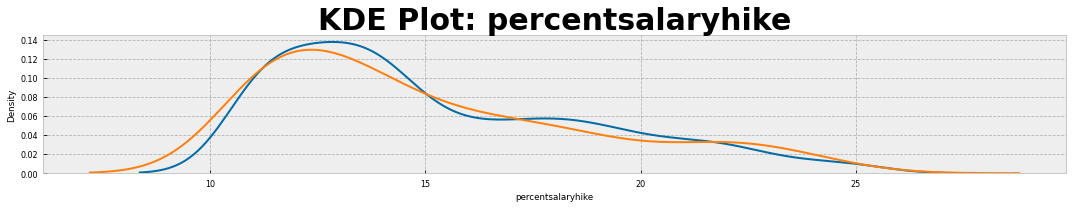

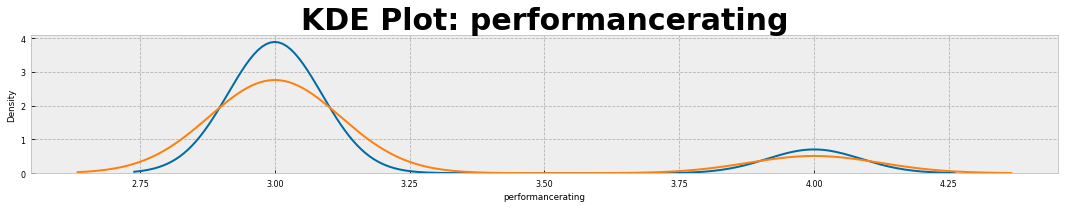

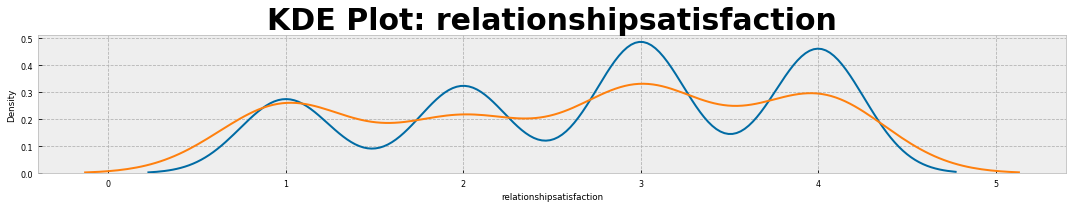

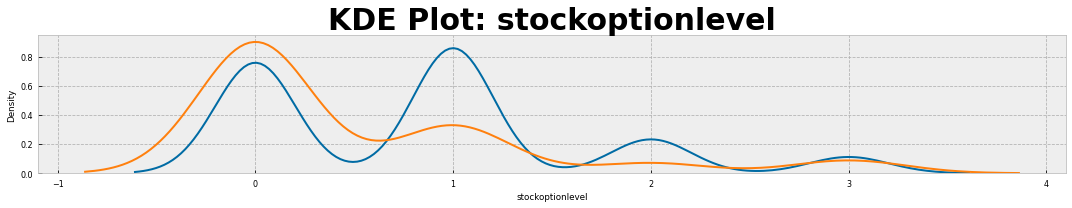

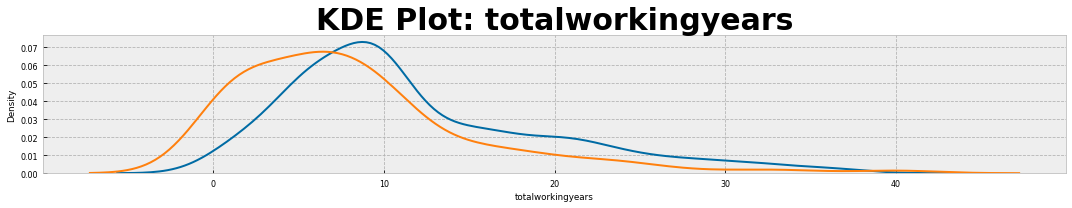

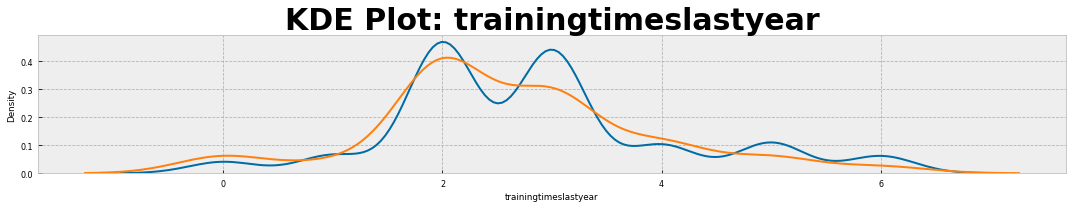

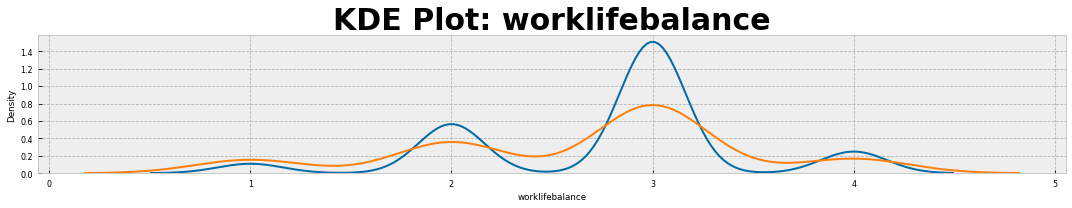

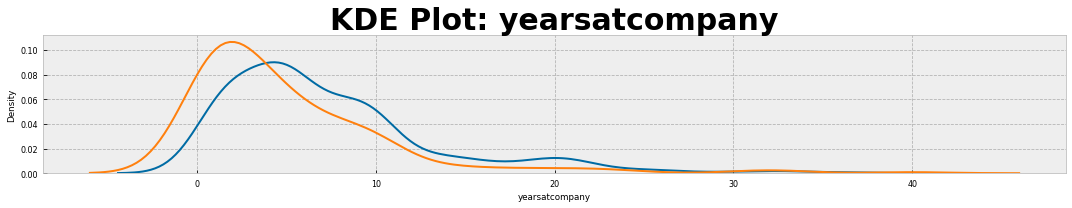

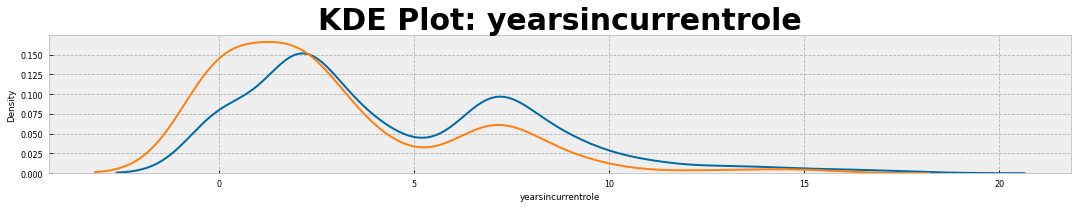

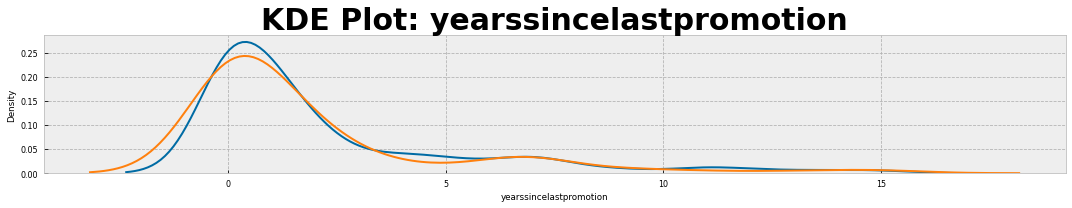

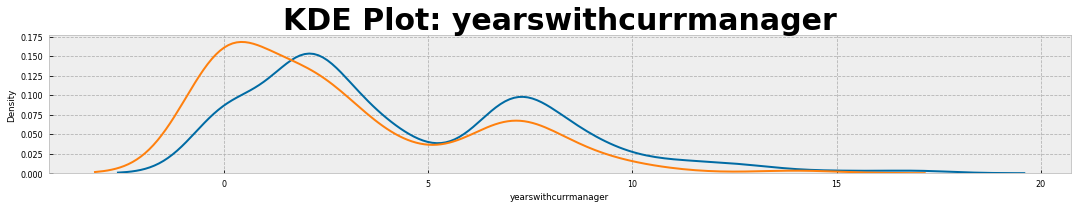

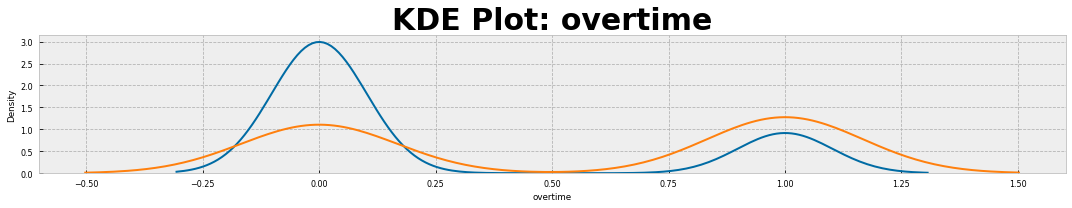

In [16]:
for var in numerical:
    eda_numerical(df, var)

In [17]:
features = ['distancefromhome', 'education', 'joblevel', 'jobsatisfaction', 'monthlyincome',
            'percentsalaryhike', 'performancerating', 'stockoptionlevel', 'worklifebalance', 
            'yearssincelastpromotion', 'yearsincurrentrole']

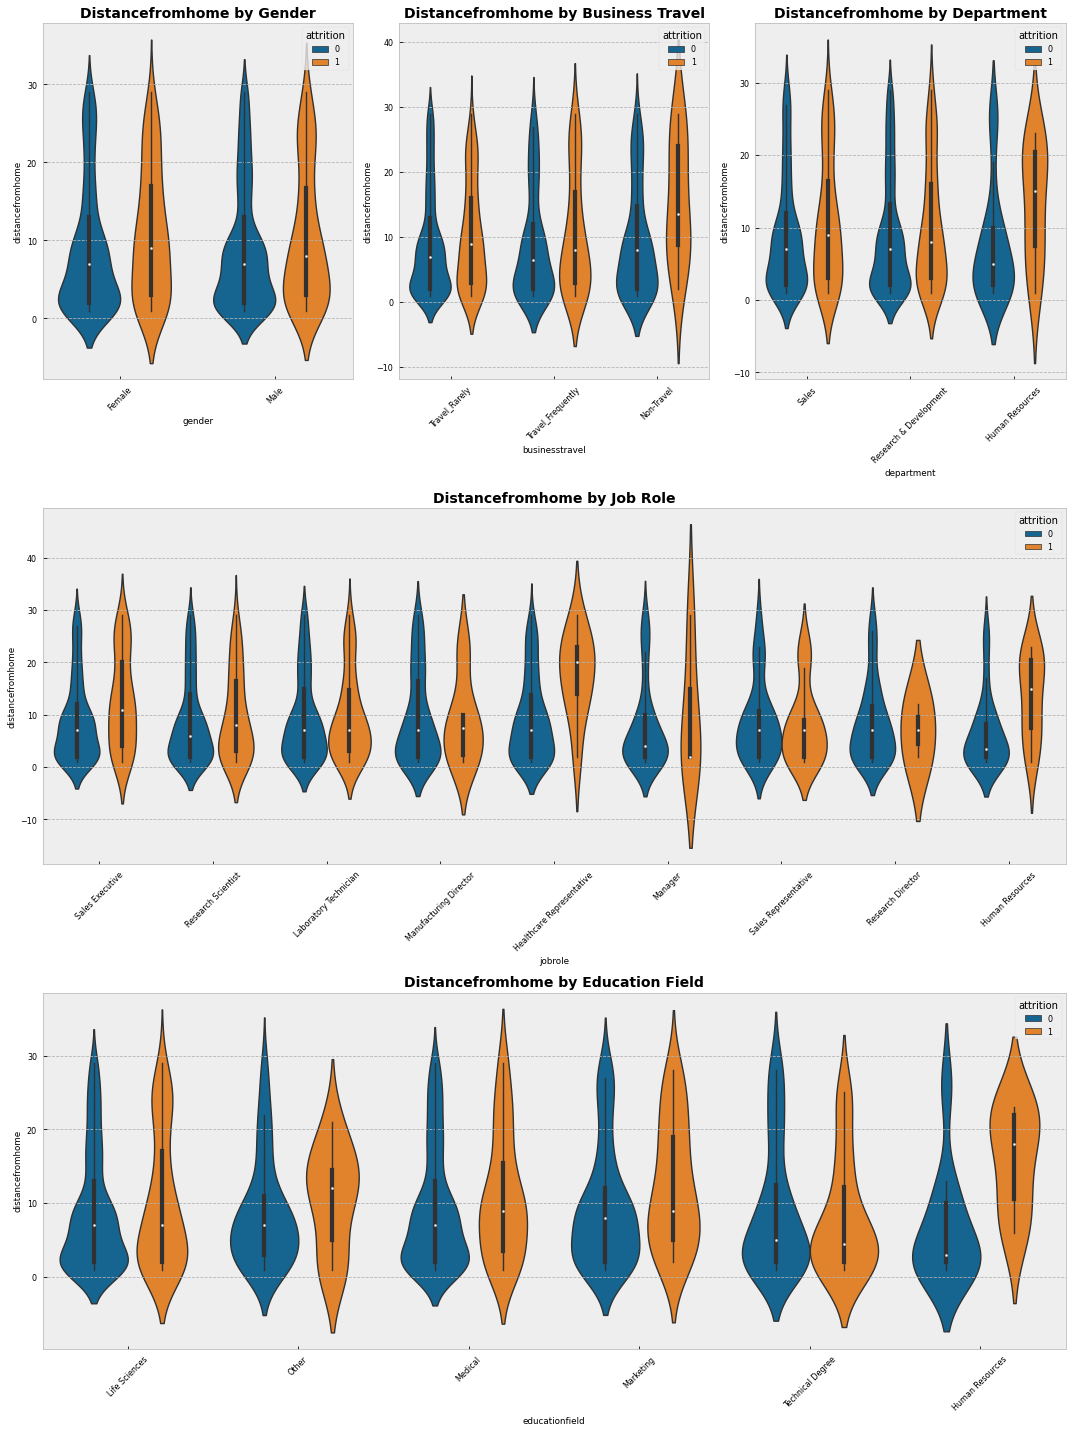

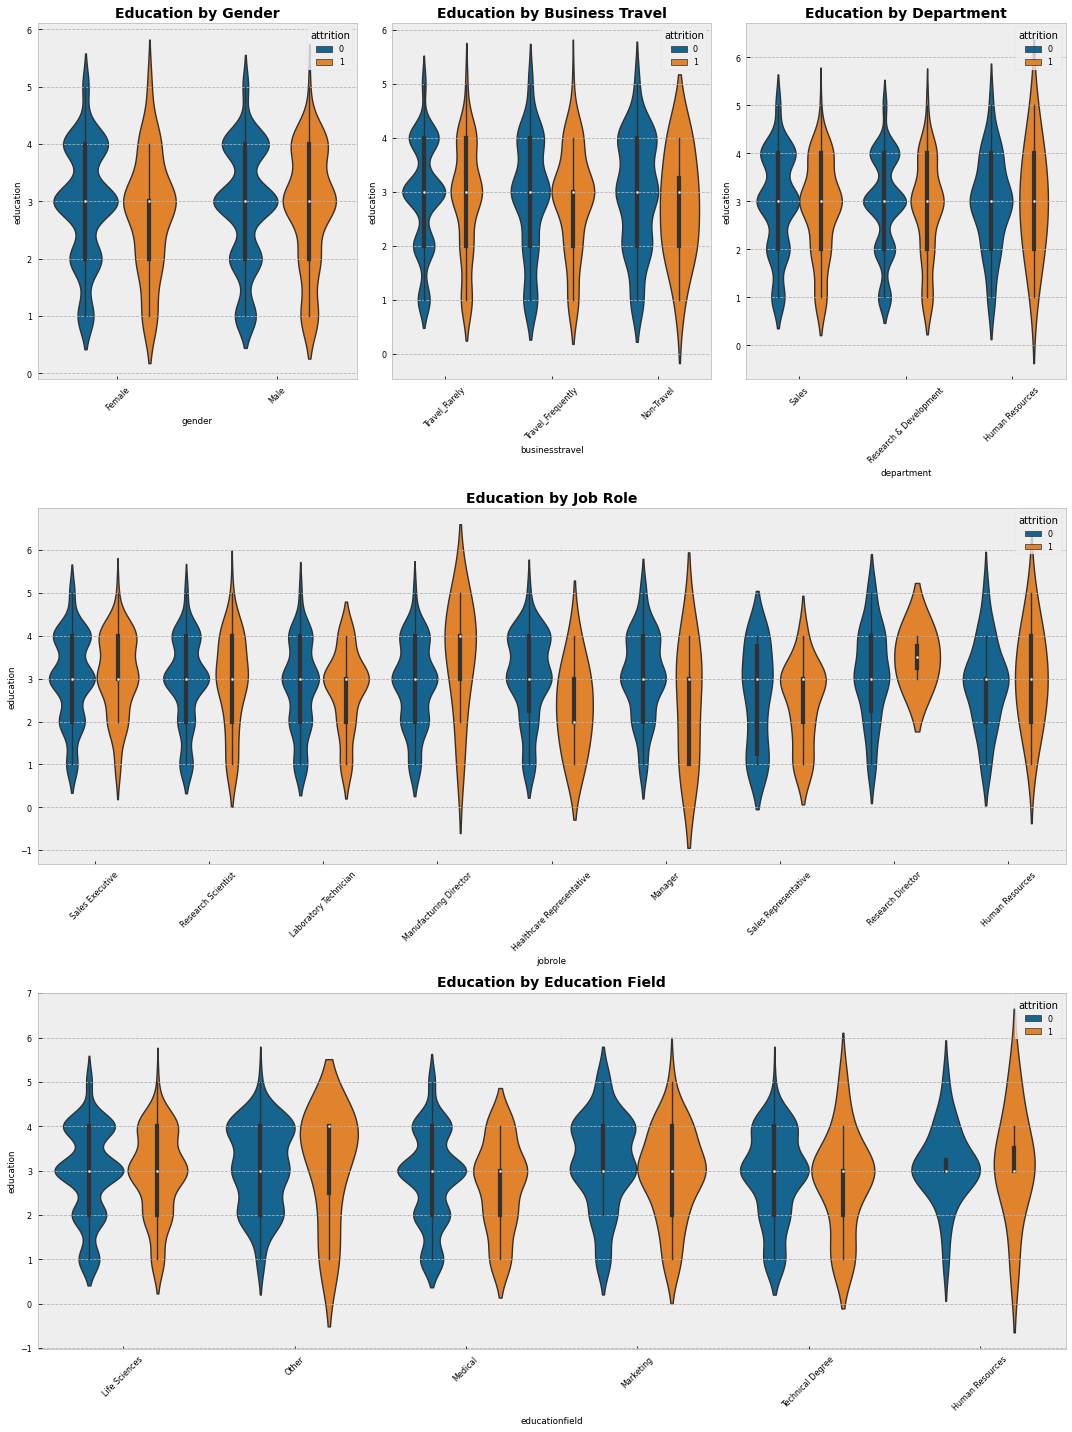

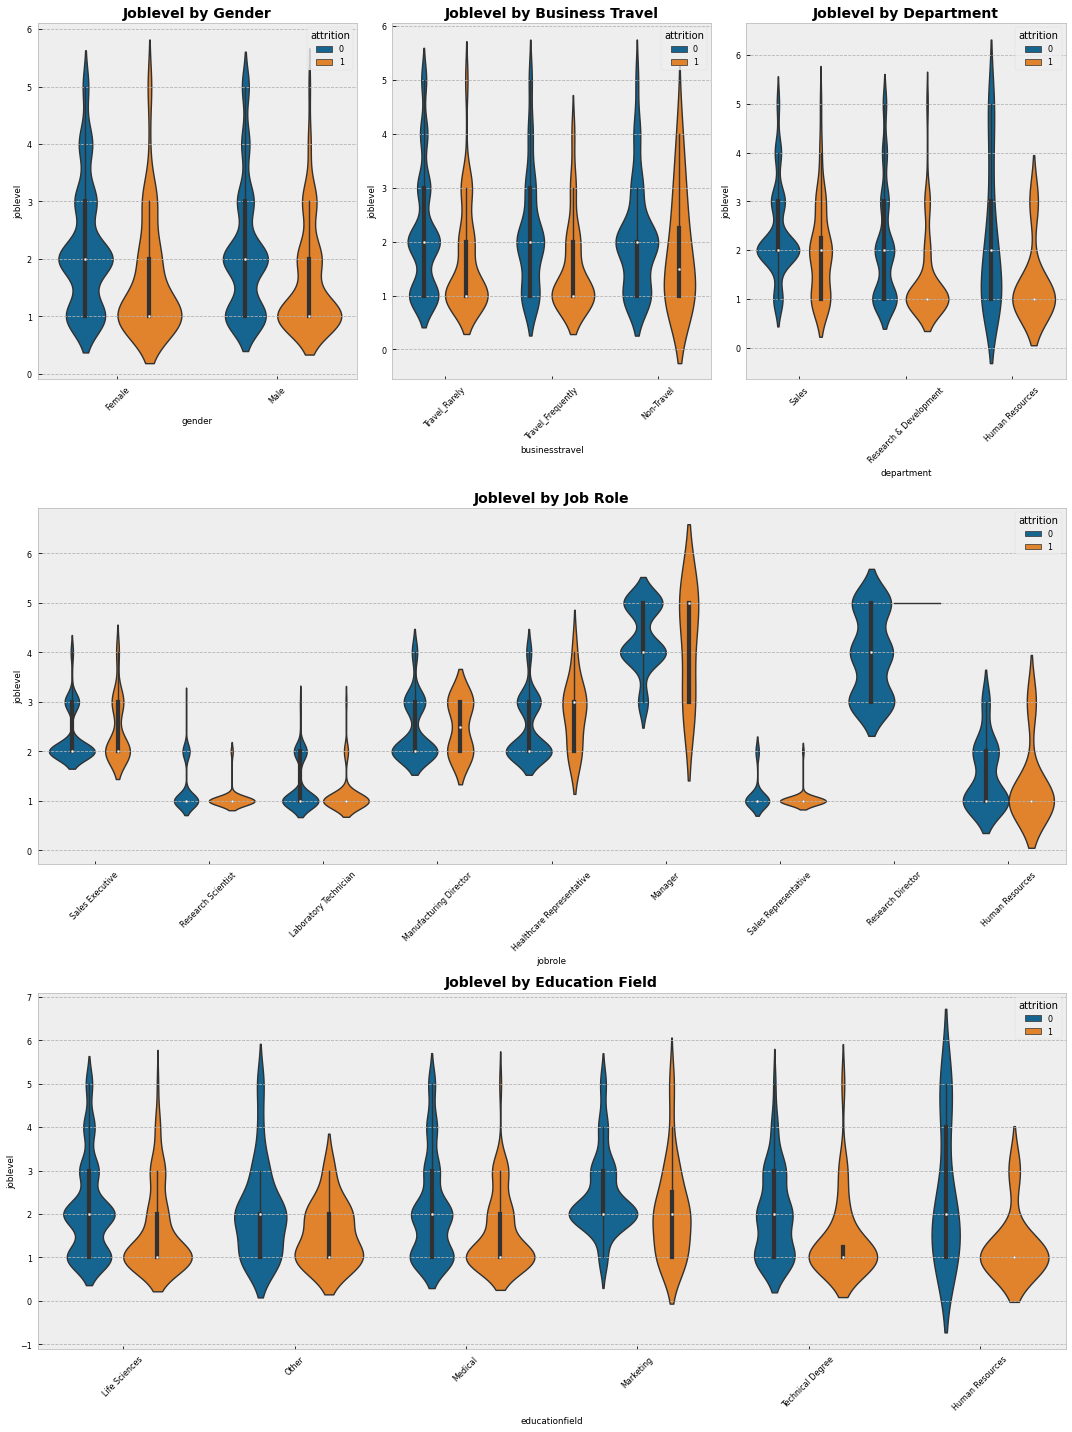

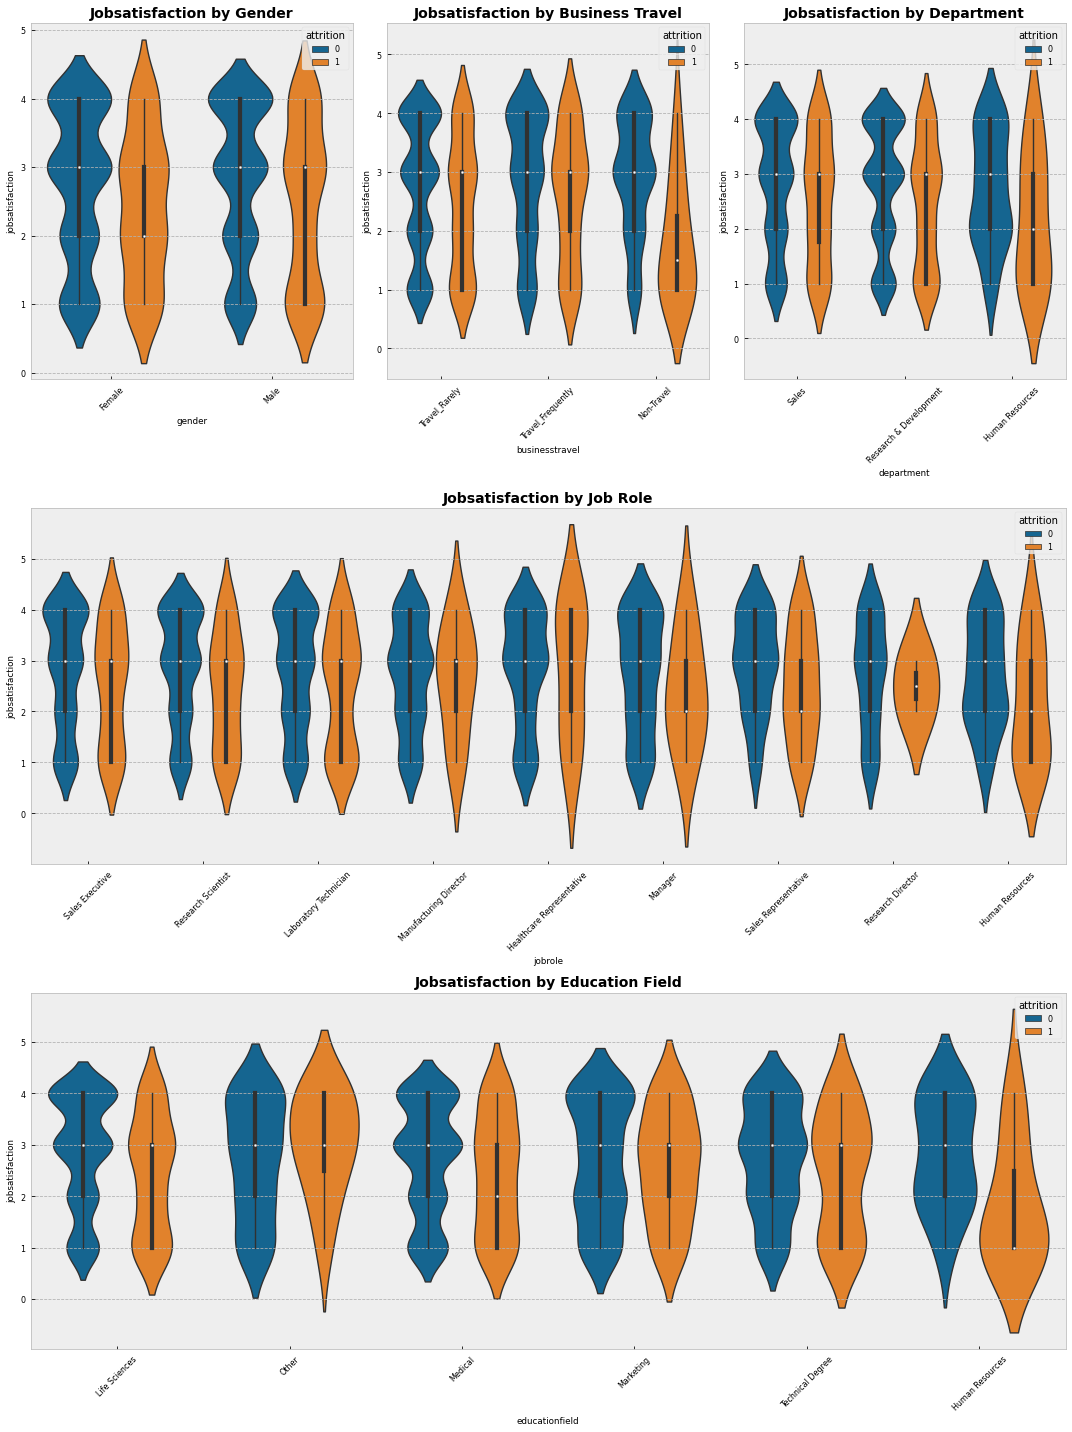

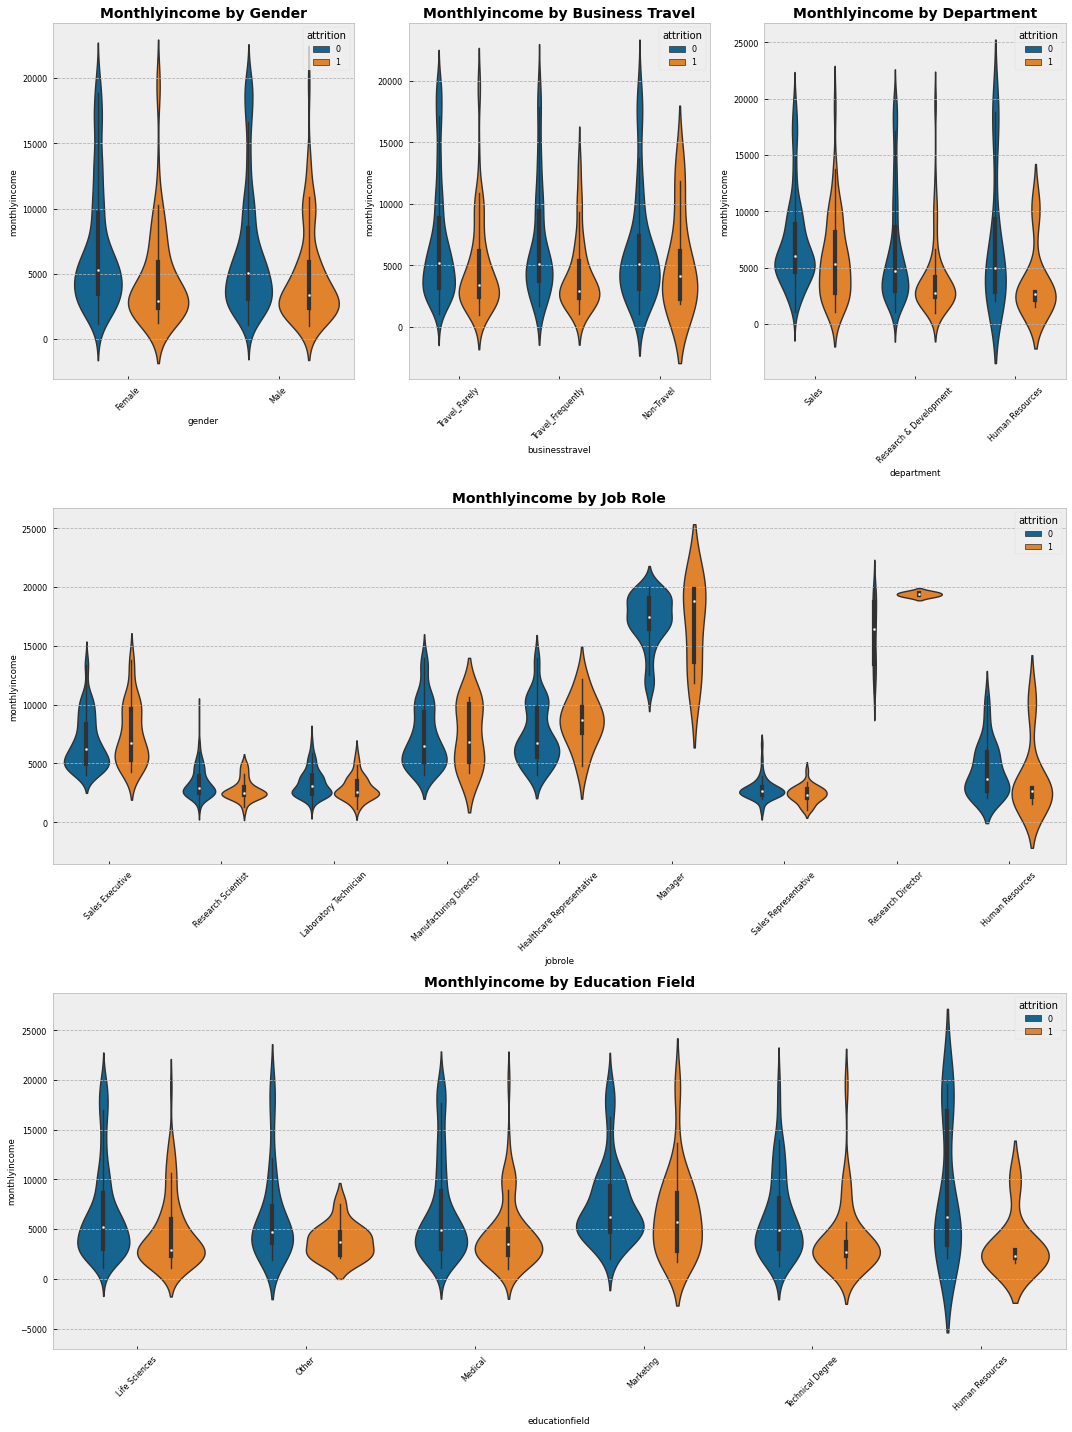

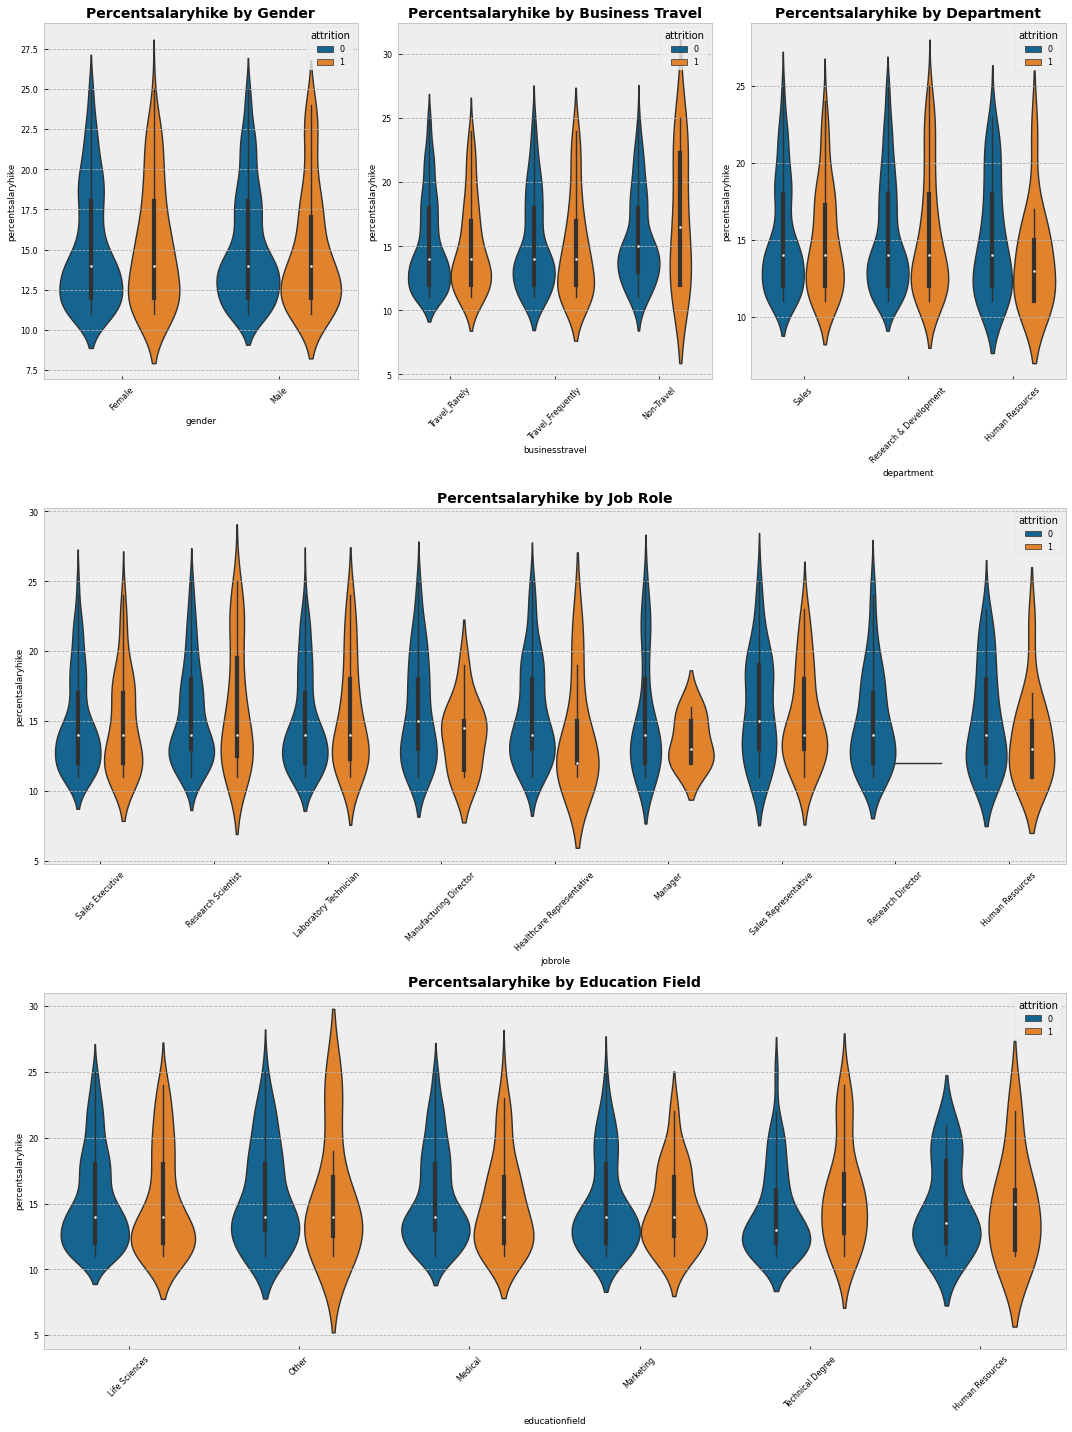

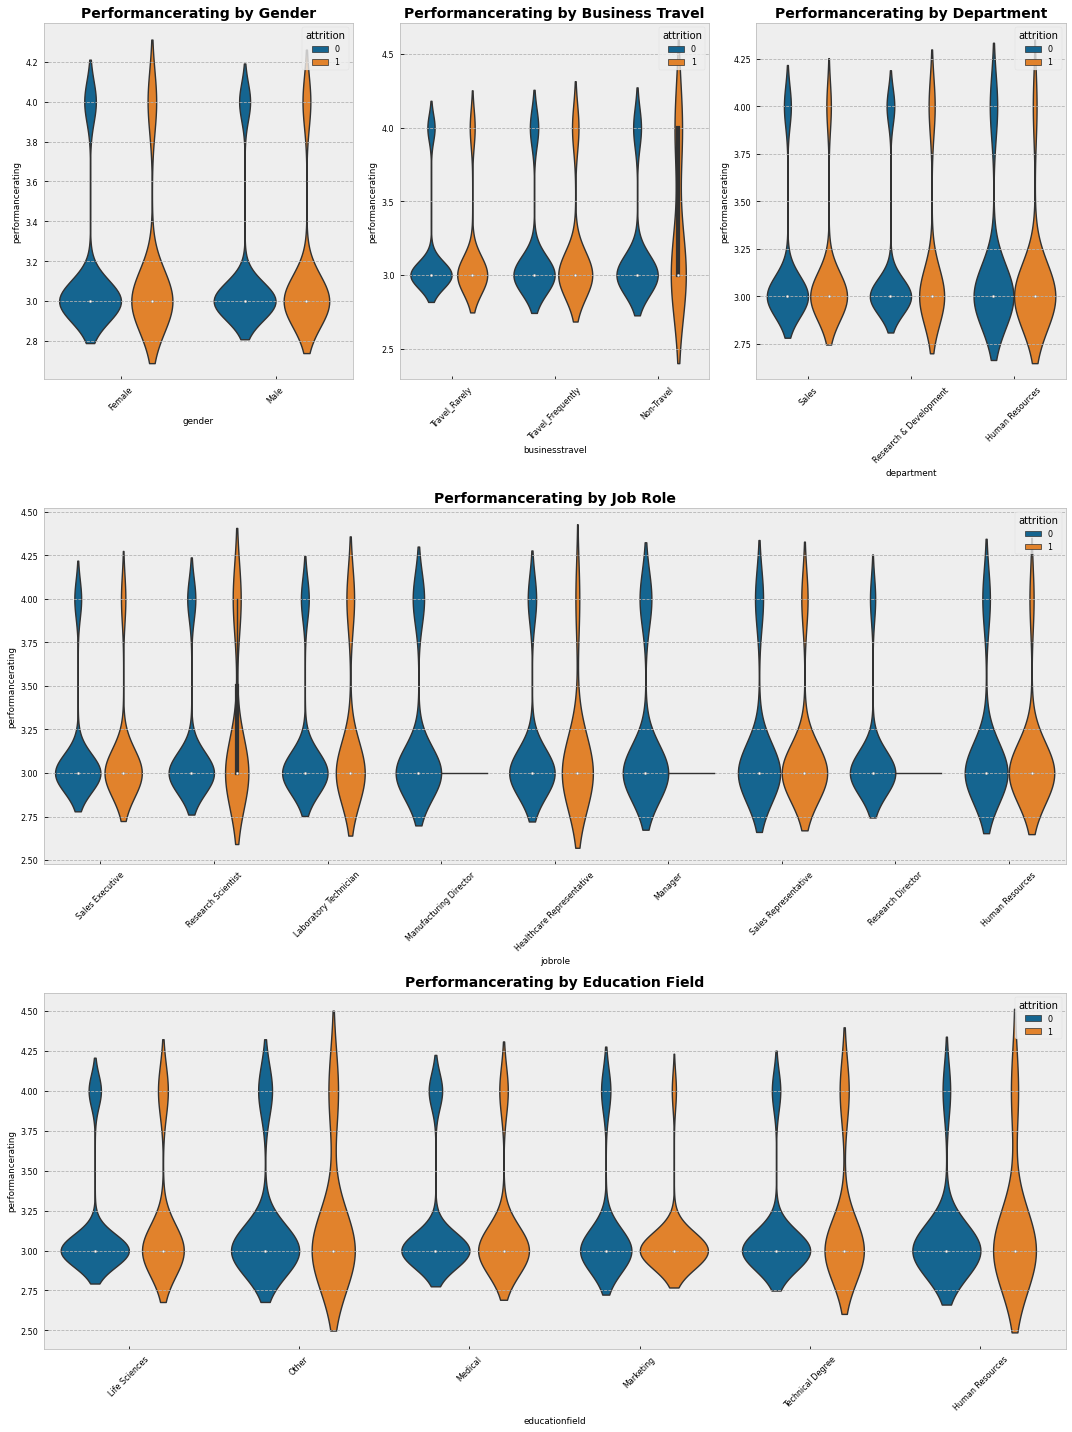

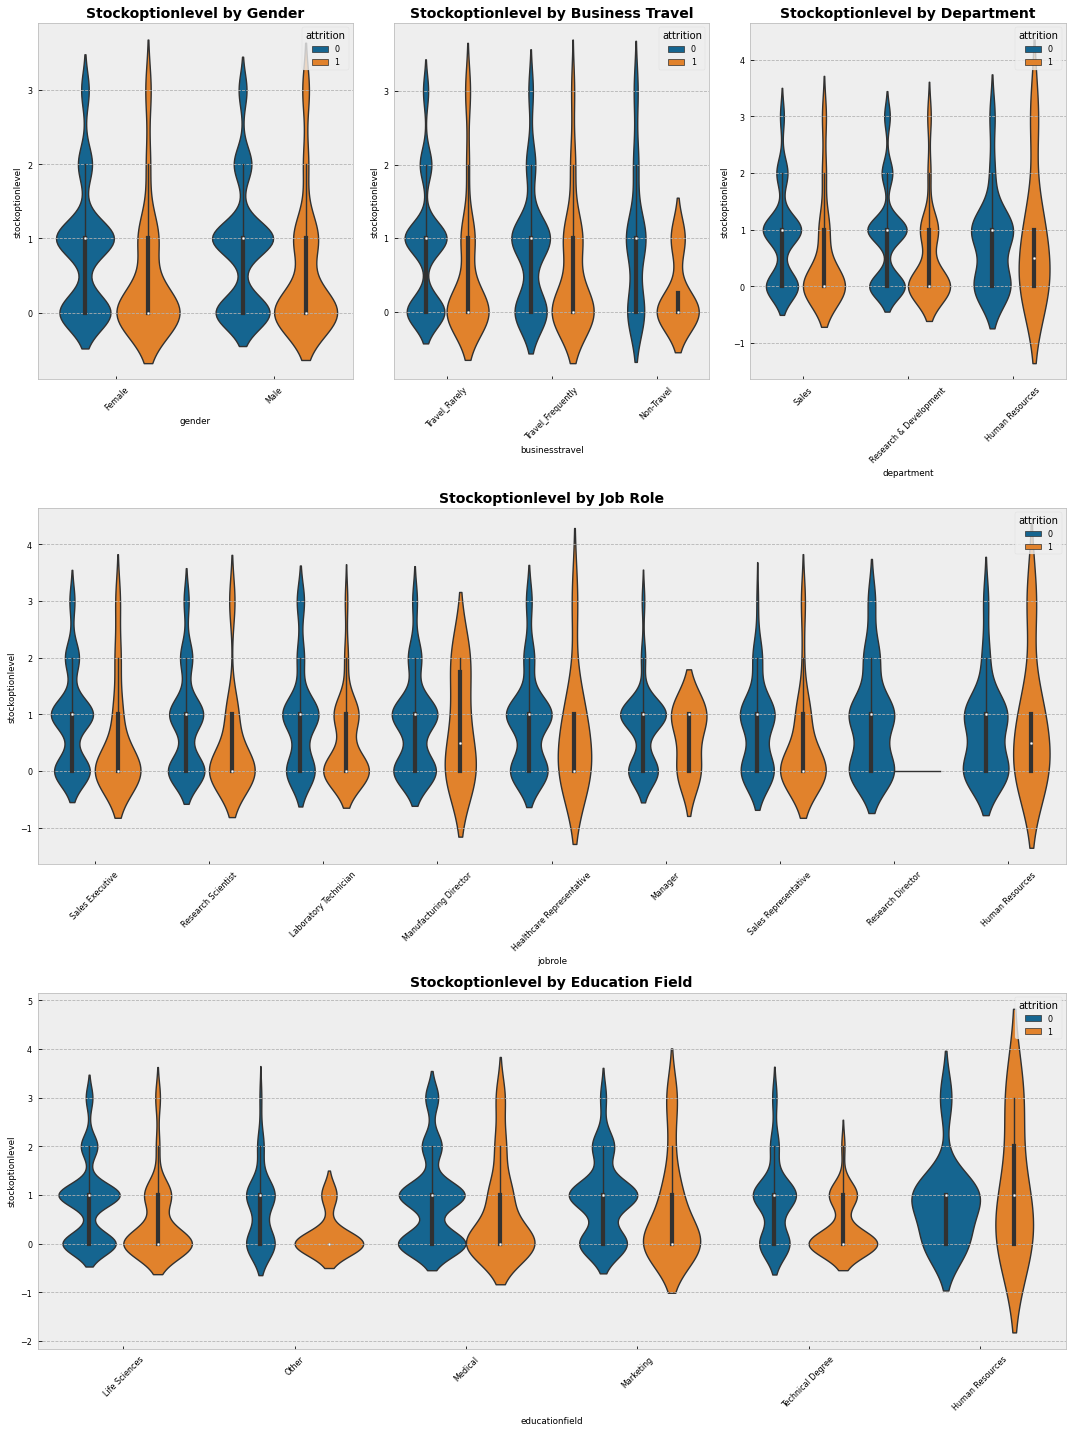

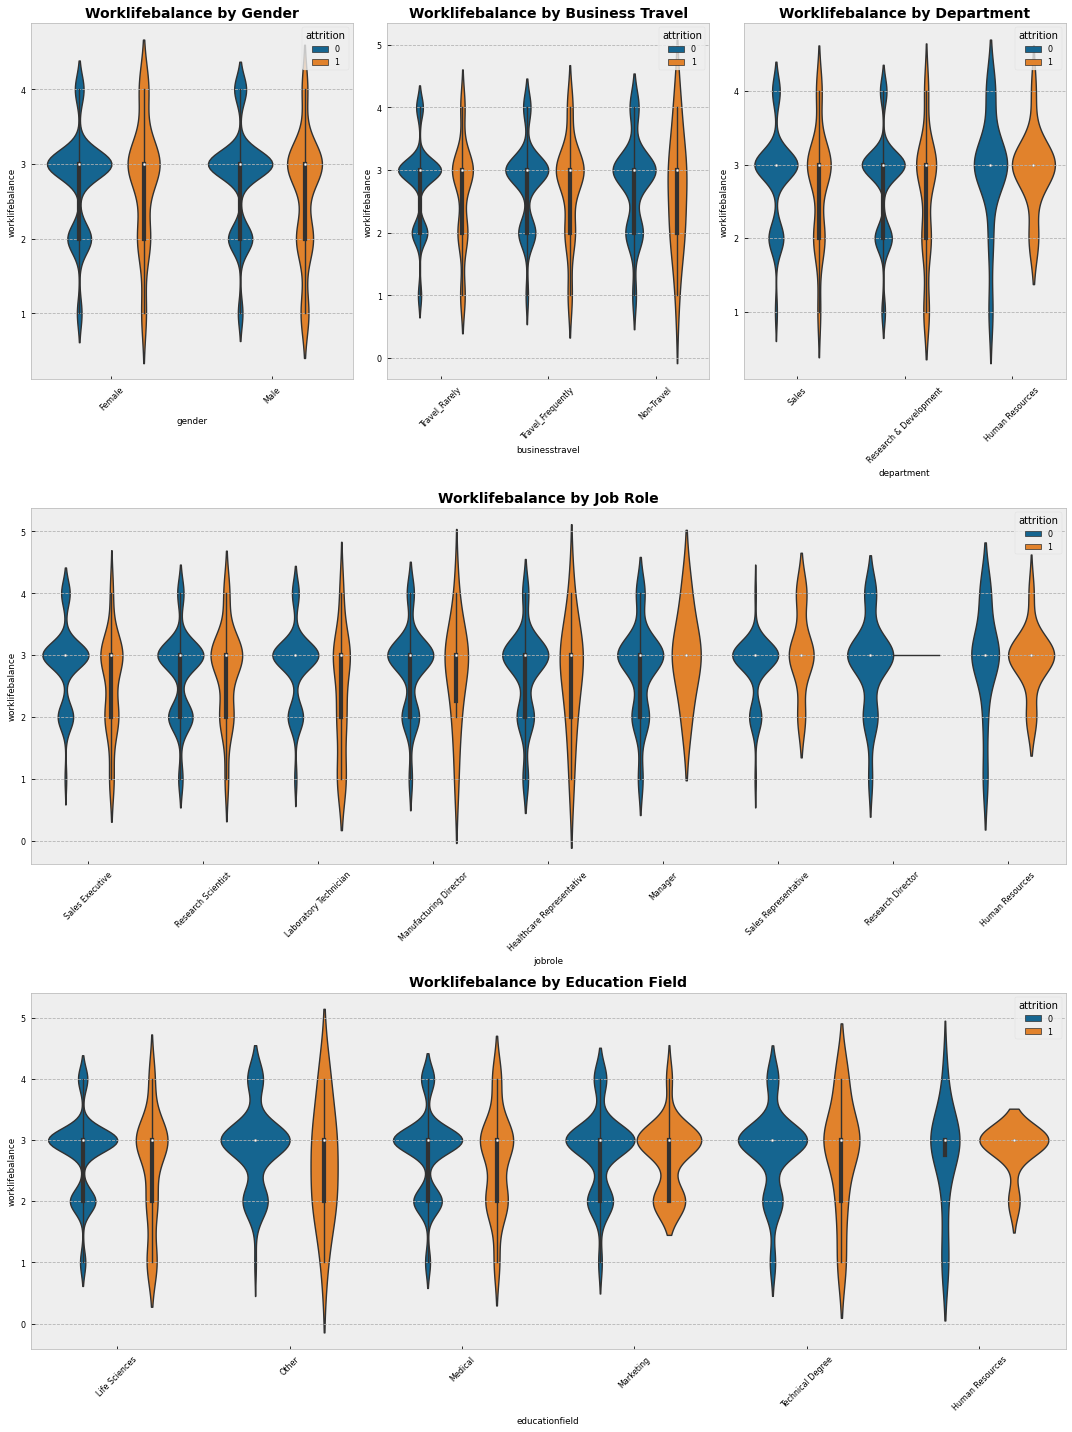

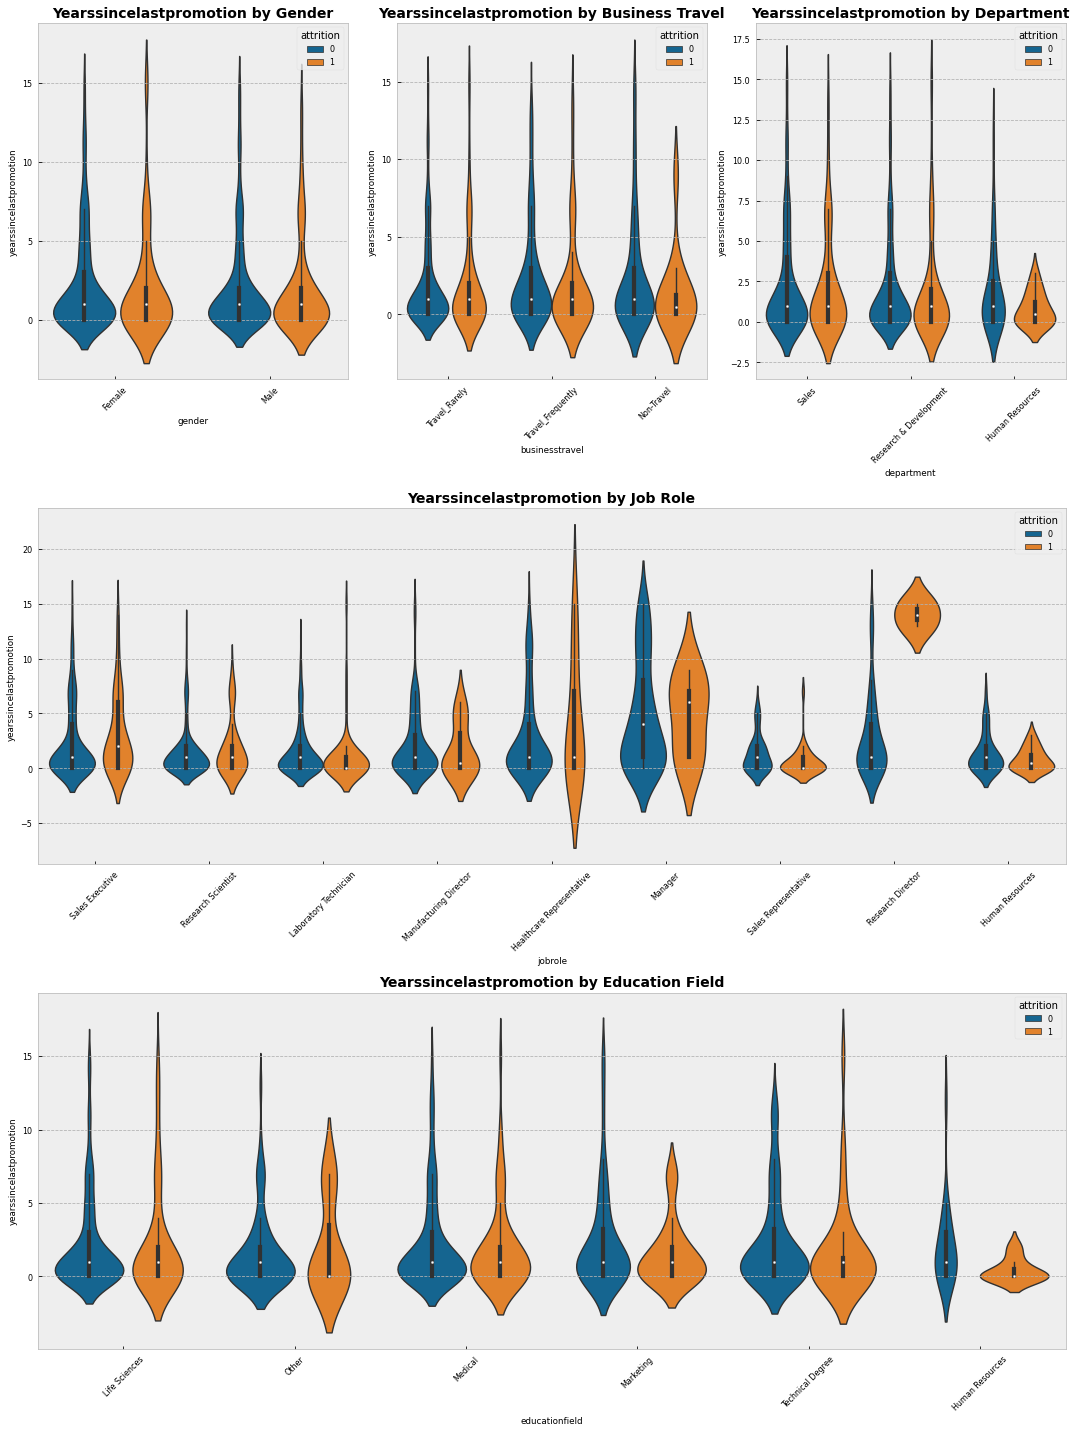

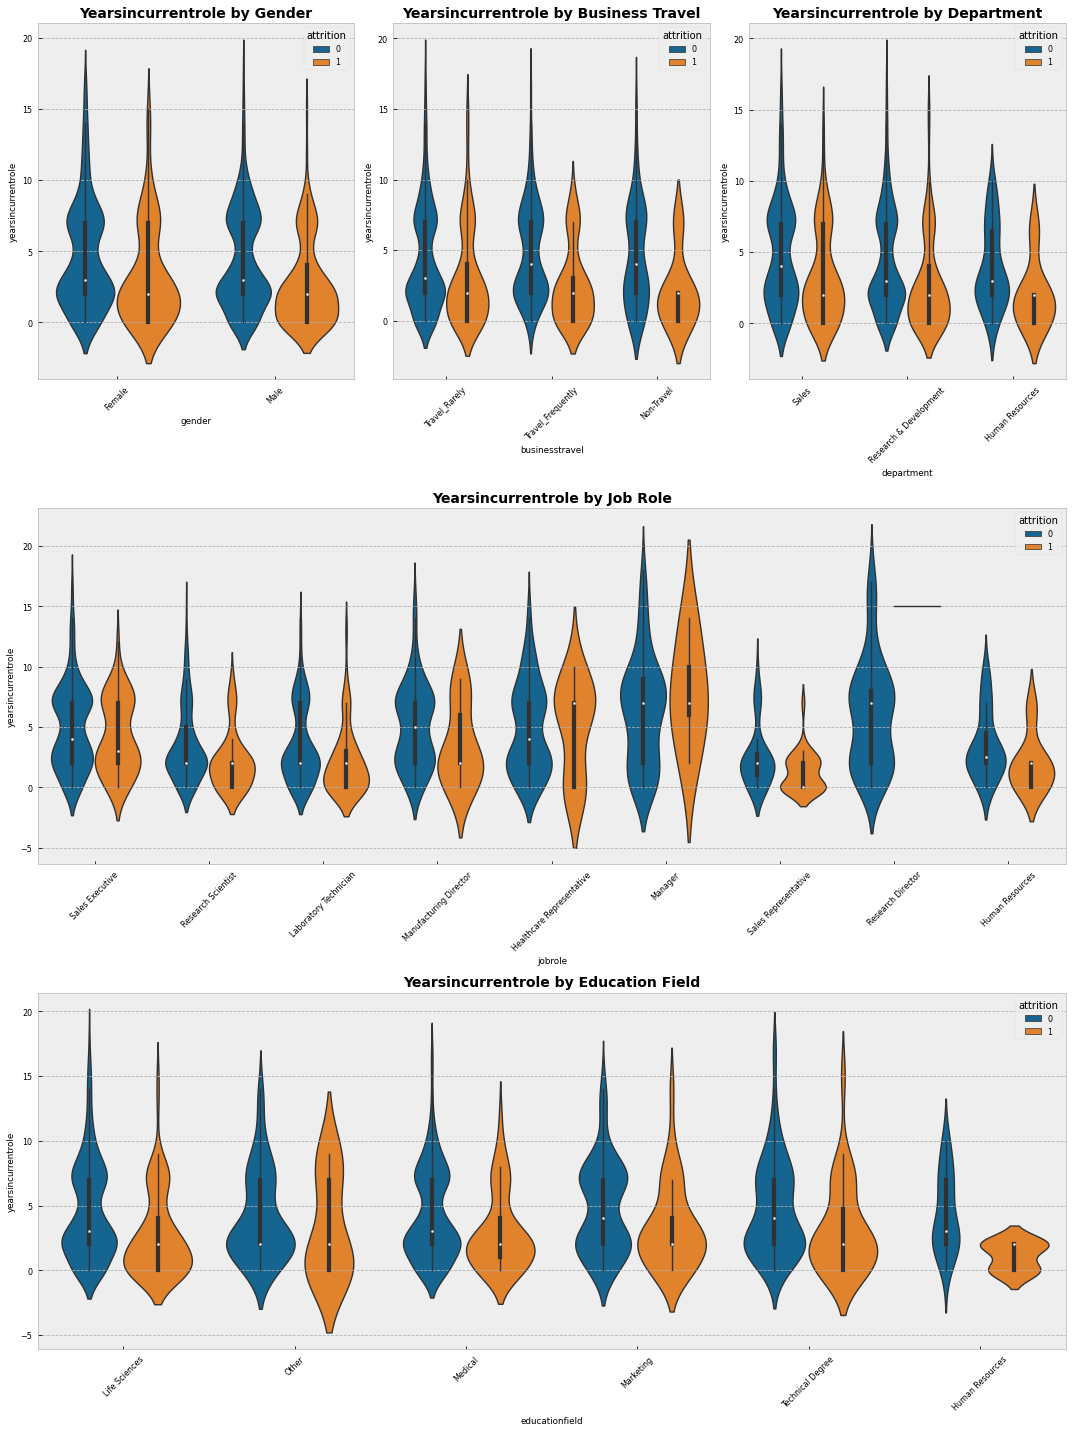

In [18]:
for var in features:
    cat_comparison(df, var)

/home/tdraths/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tdraths/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tdraths/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tdraths/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tdraths/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: Us

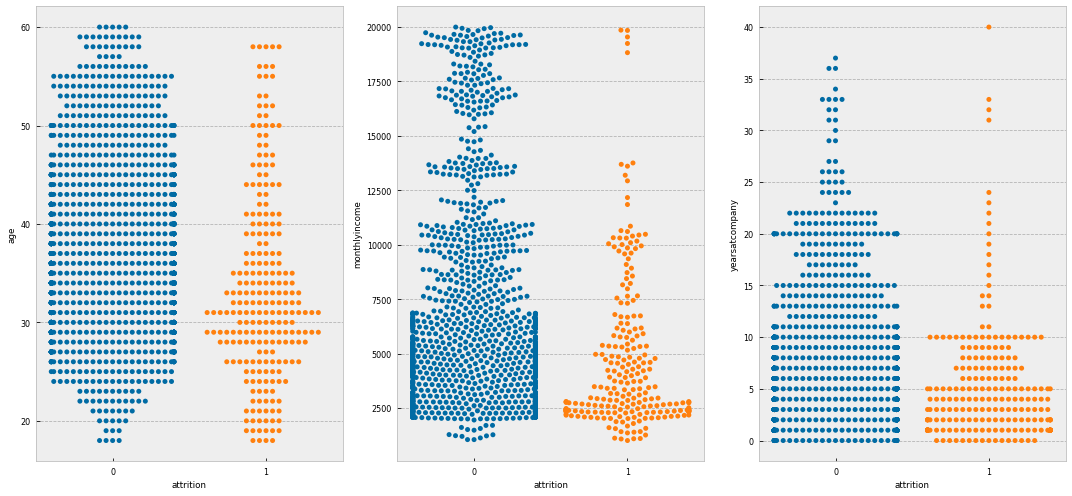

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.swarmplot(x='attrition', y='age', data=df)
plt.subplot(132)
sns.swarmplot(x='attrition', y='monthlyincome', data=df)
plt.subplot(133)
sns.swarmplot(x='attrition', y='yearsatcompany', data=df)
plt.tight_layout();

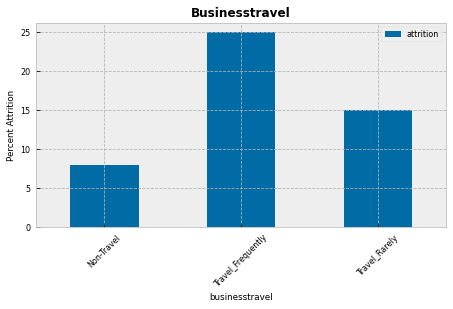

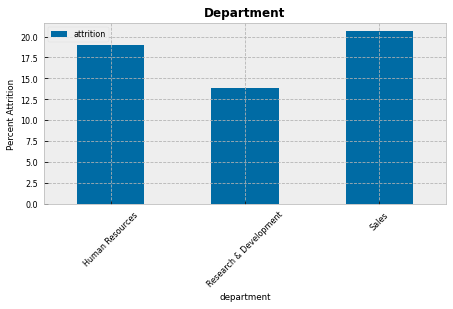

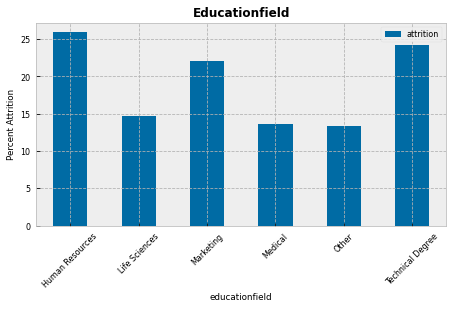

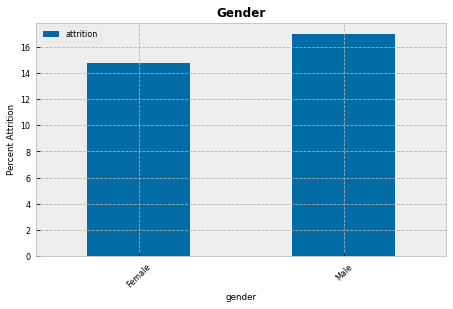

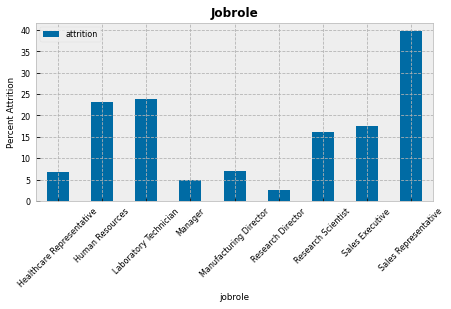

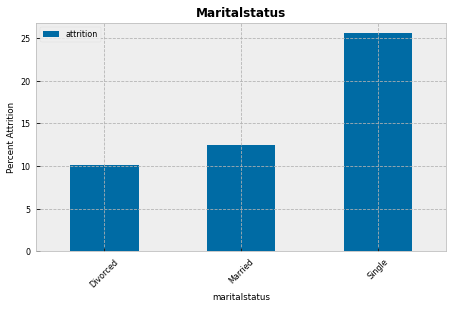

In [20]:
def cat_attrition(feature):    
    attrit = df.groupby([feature]).agg({'attrition': 'sum'})
    whole = df.groupby([feature]).agg({'attrition': 'count'})
    attrit_pct = attrit.div(whole, level=feature) * 100.0
    attrit_pct.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.ylabel('Percent Attrition')
    plt.title(feature.title(),fontsize=12, fontweight='bold')
    plt.tight_layout()
    
for feature in categorical:
    cat_attrition(feature)

/home/tdraths/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


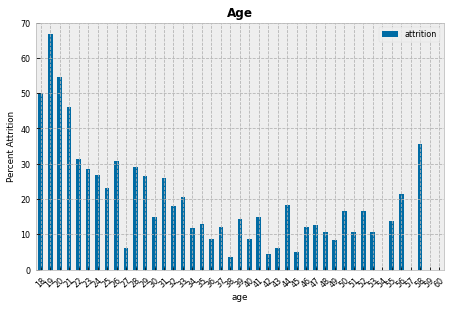

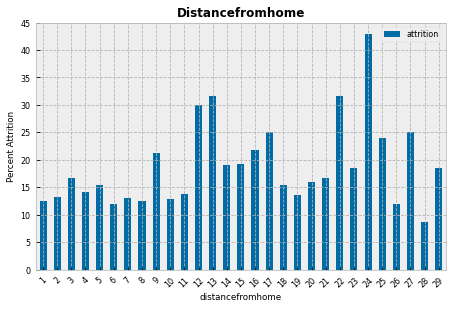

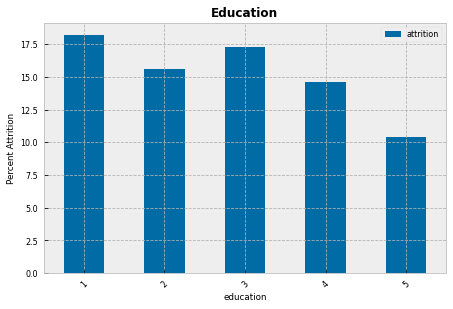

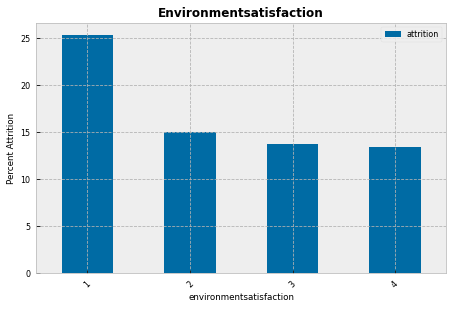

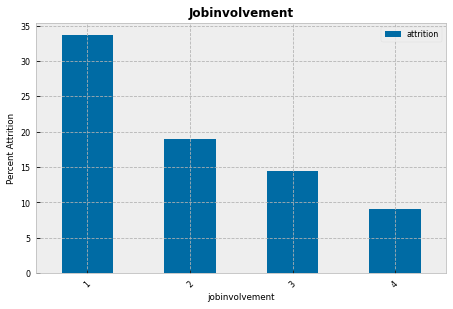

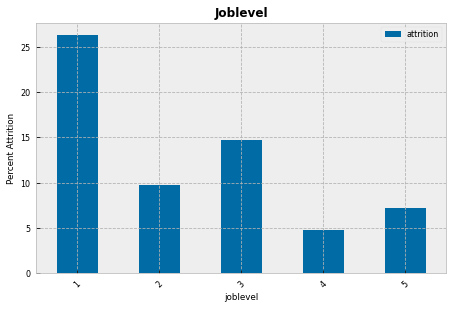

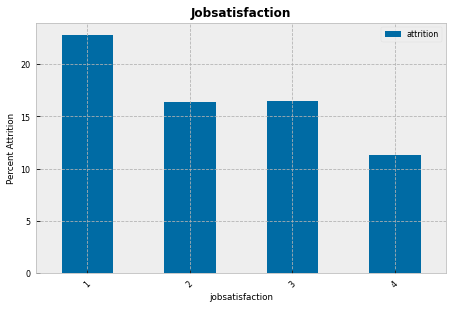

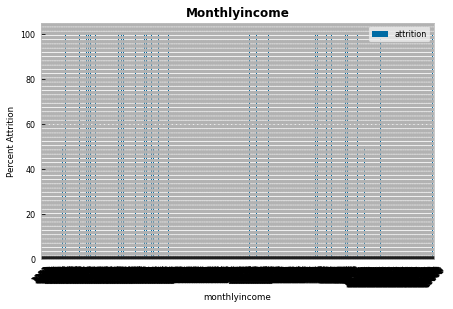

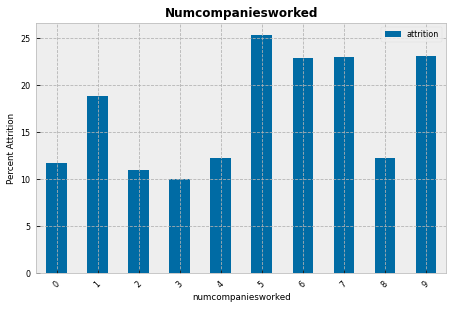

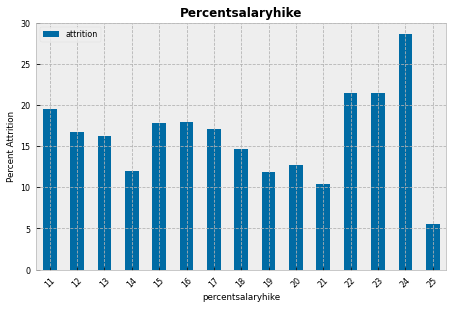

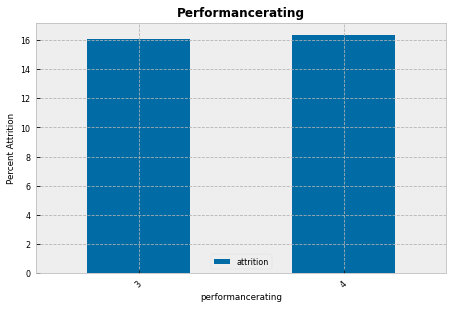

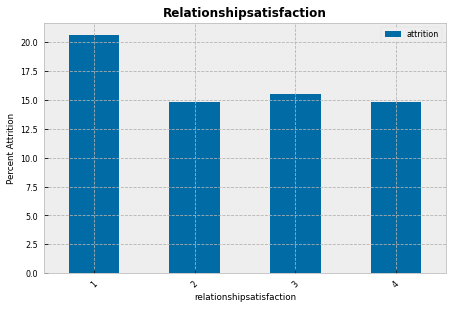

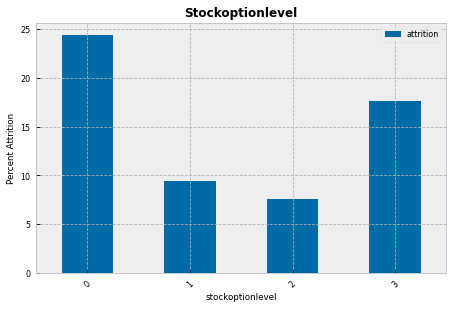

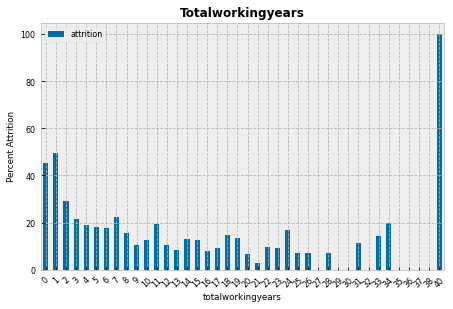

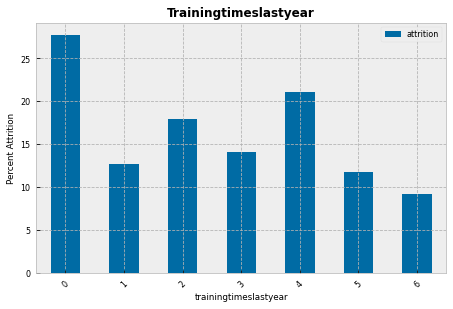

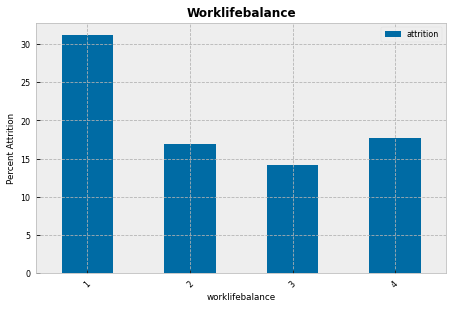

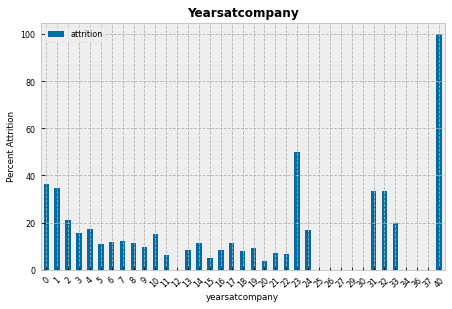

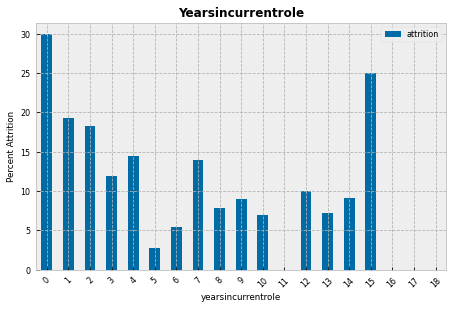

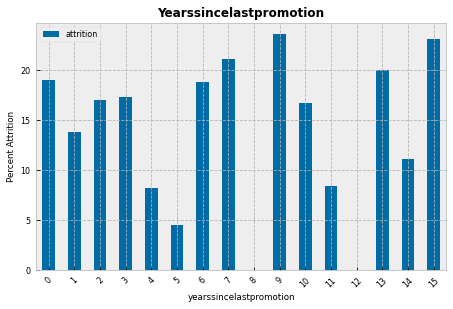

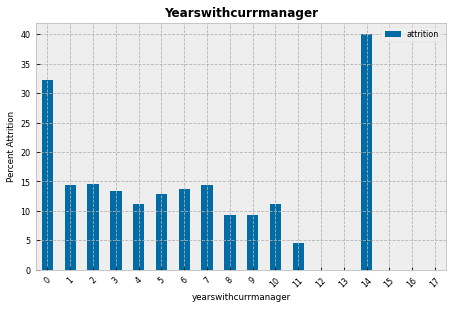

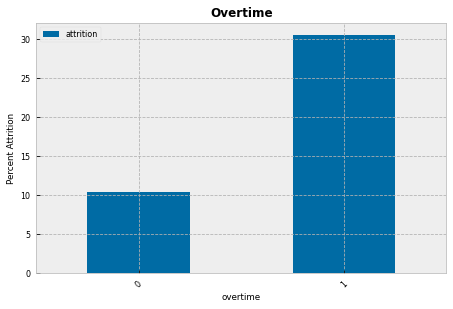

In [21]:
def numerical_attrition(feature):    
    attrit = df.groupby([feature]).agg({'attrition': 'sum'})
    whole = df.groupby([feature]).agg({'attrition': 'count'})
    attrit_pct = attrit.div(whole, level=feature) * 100.0
    attrit_pct.plot(kind='bar')
    plt.ylabel(attrit_pct.columns[0])
    plt.xticks(rotation=45)
    plt.ylabel('Percent Attrition')
    plt.title(feature.title(),fontsize=12, fontweight='bold')
    plt.tight_layout()


for feature in numerical:
    numerical_attrition(feature)

# Pre-processing Data

In [24]:
dummy_df = pd.get_dummies(df)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                1470 non-null   int64
 1   attrition                          1470 non-null   int64
 2   distancefromhome                   1470 non-null   int64
 3   education                          1470 non-null   int64
 4   environmentsatisfaction            1470 non-null   int64
 5   jobinvolvement                     1470 non-null   int64
 6   joblevel                           1470 non-null   int64
 7   jobsatisfaction                    1470 non-null   int64
 8   monthlyincome                      1470 non-null   int64
 9   numcompaniesworked                 1470 non-null   int64
 10  overtime                           1470 non-null   int64
 11  percentsalaryhike                  1470 non-null   int64
 12  performancerating   

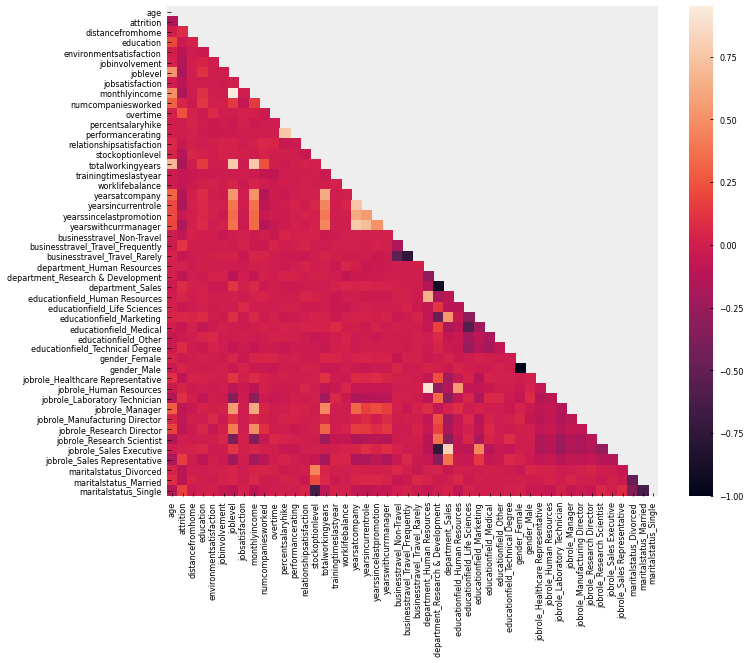

In [27]:
# Compute the correlation matrix
corr = dummy_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask);

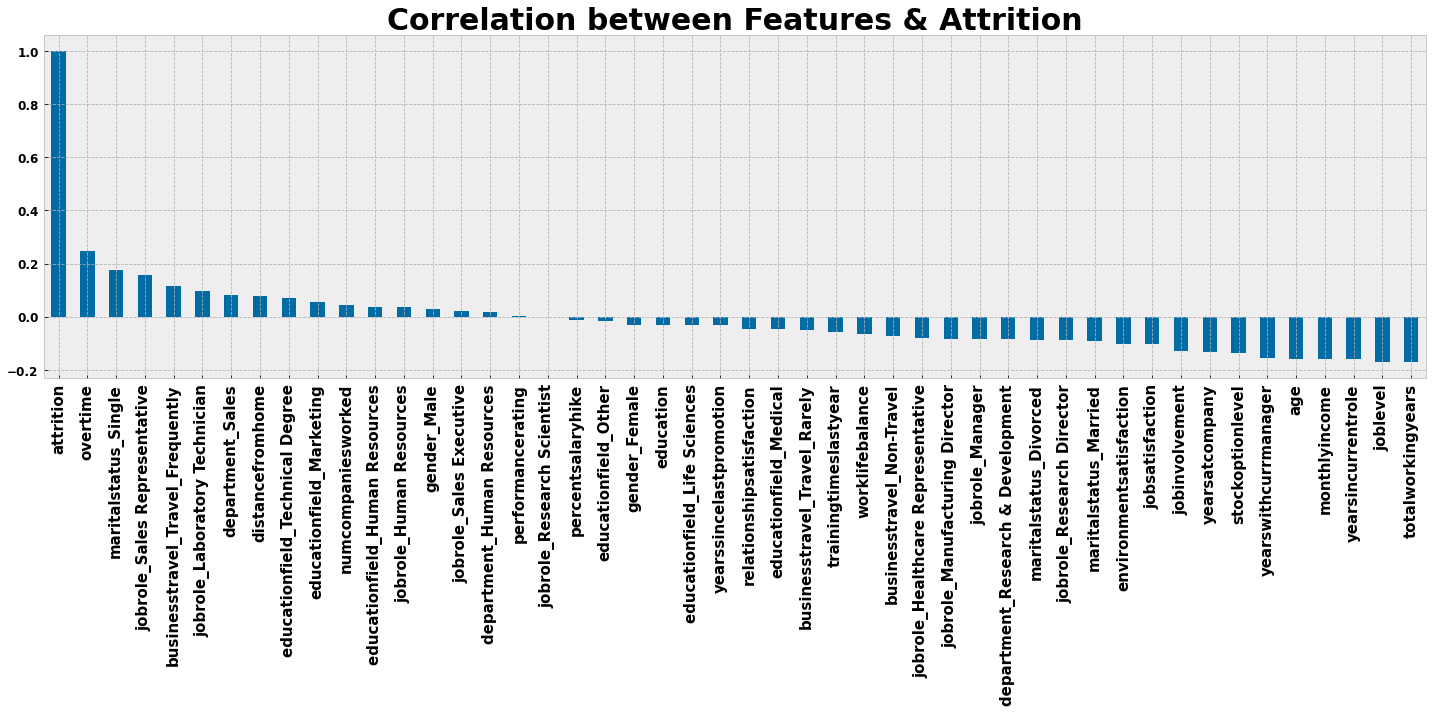

In [32]:
dummy_df.corr()['attrition'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10))
plt.title('Correlation between Features & Attrition', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout();